In [76]:
from sklearn import cluster
import networkx as nx
from collections import defaultdict
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import adjusted_rand_score

In [77]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
print("Reading")
#m2=399795-703091
col_names = ['ID','PARTNUMBER','SERIALNUMBER','PRODUCTIONRUN','MACHINENAME','CYCLENUMBER','CURRENTCYCLETIME','CYCLETIME','FILLTIME','SCREWRETPOSITION','TRANSITIONPOSITION','CUSHIONSIZE','REFILLTIME','NOZZLETEMP','BACKPRESS','INJSPEEDSEG1','INJSPEEDSEG2','INJSPEEDSEG3','PACKPRESSSEG1','HOLDPRESSSEG1','TRANSITIONPRESSURE','STOREDDATE','ACTIVE_MONITORINGID','PEAKPRESSURE','INJECTIONPRESSURE','ISBADPIECE','CYCLETIMEMIN','CYCLETIMEMAX','FILLTIMEMIN','FILLTIMEMAX','SCREWRETPOSITIONMIN','SCREWRETPOSITIONMAX','TRANSITIONPOSITIONMIN','TRANSITIONPOSITIONMAX','CUSHIONSIZEMIN','CUSHIONSIZEMAX','REFILLTIMEMIN','REFILLTIMEMAX','NOZZLETEMPMIN','NOZZLETEMPMAX','BACKPRESSMIN','BACKPRESSMAX','PEAKPRESSUREMIN','PEAKPRESSUREMAX','TRANSITIONPRESSUREMIN','TRANSITIONPRESSUREMAX','PACKPRESSSEG1MIN','PACKPRESSSEG1MAX','TOOLNUMBER']
data= pd.read_csv('sorted_data.csv',sep=',',nrows=403555,skiprows=1189957,names=col_names)
print("Reading done")
data.head()

Reading
Reading done


,ID,PARTNUMBER,SERIALNUMBER,PRODUCTIONRUN,MACHINENAME,CYCLENUMBER,CURRENTCYCLETIME,CYCLETIME,FILLTIME,SCREWRETPOSITION,...,NOZZLETEMPMAX,BACKPRESSMIN,BACKPRESSMAX,PEAKPRESSUREMIN,PEAKPRESSUREMAX,TRANSITIONPRESSUREMIN,TRANSITIONPRESSUREMAX,PACKPRESSSEG1MIN,PACKPRESSSEG1MAX,TOOLNUMBER
0,178682229,13673591.0,9894380484,860202,4,1888,NaN,19.4,1.03,1.12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13673591 PM A 0001
1,166845693,13593466.0,9894203735,836719,4,996,NaN,17.2,0.98,0.96,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13593466 PM A 0002
2,178733037,13673591.0,9894380487,860202,4,2633,NaN,19.6,1.02,1.12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13673591 PM A 0001
3,151001365,13673591.0,9893981618,814925,4,6640,NaN,20.7,1.00,1.11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13673591 PM A 0001
4,176639067,13673591.0,9894331286,857379,4,12325,NaN,20.0,1.00,1.11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13673591 PM A 0001


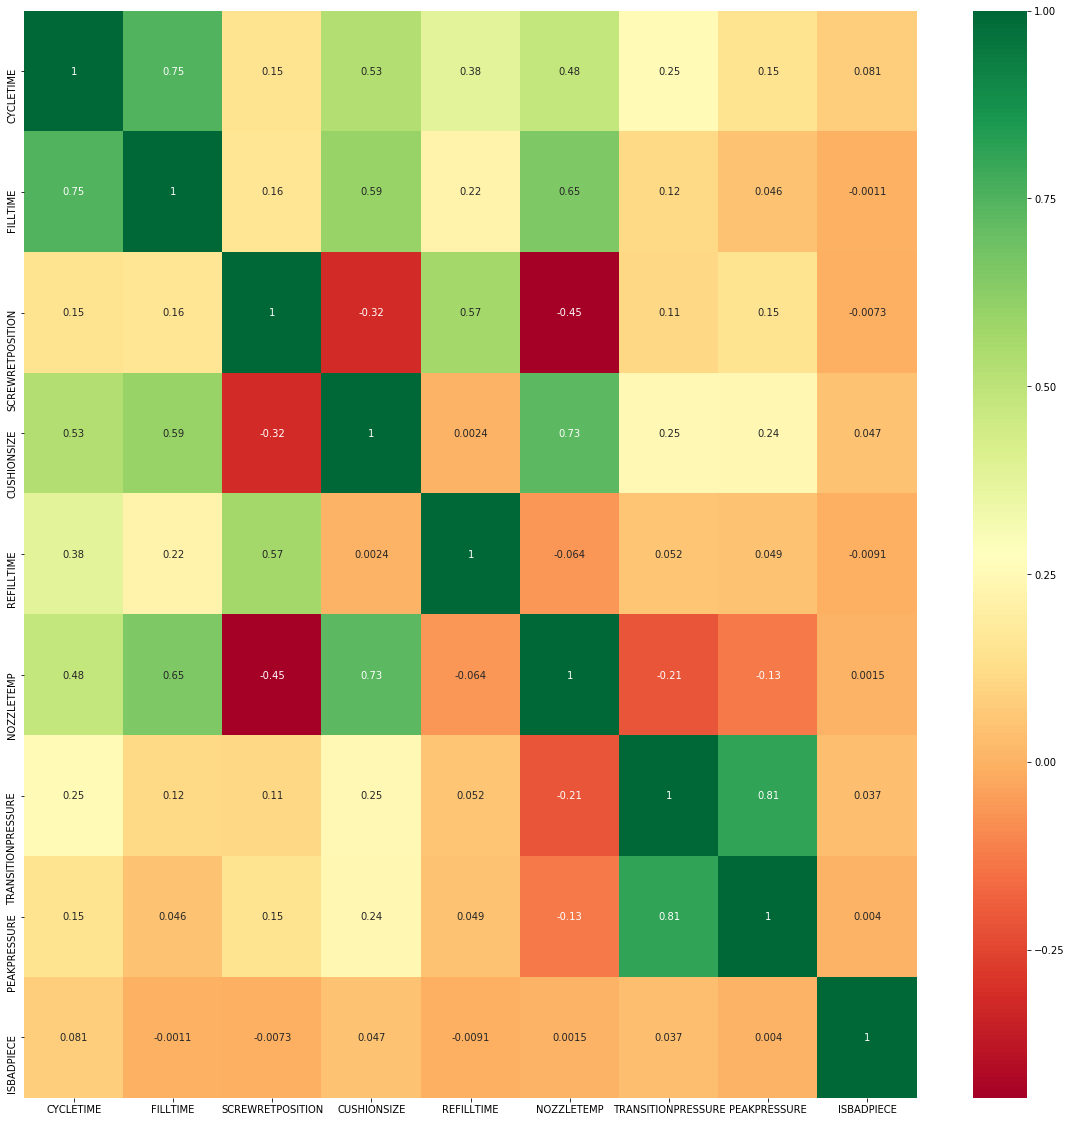

In [78]:
cols=['CYCLETIME','FILLTIME','SCREWRETPOSITION', 'CUSHIONSIZE', 'REFILLTIME','NOZZLETEMP', 'TRANSITIONPRESSURE','PEAKPRESSURE','ISBADPIECE']
data2=data[cols]
corrmat = data2.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

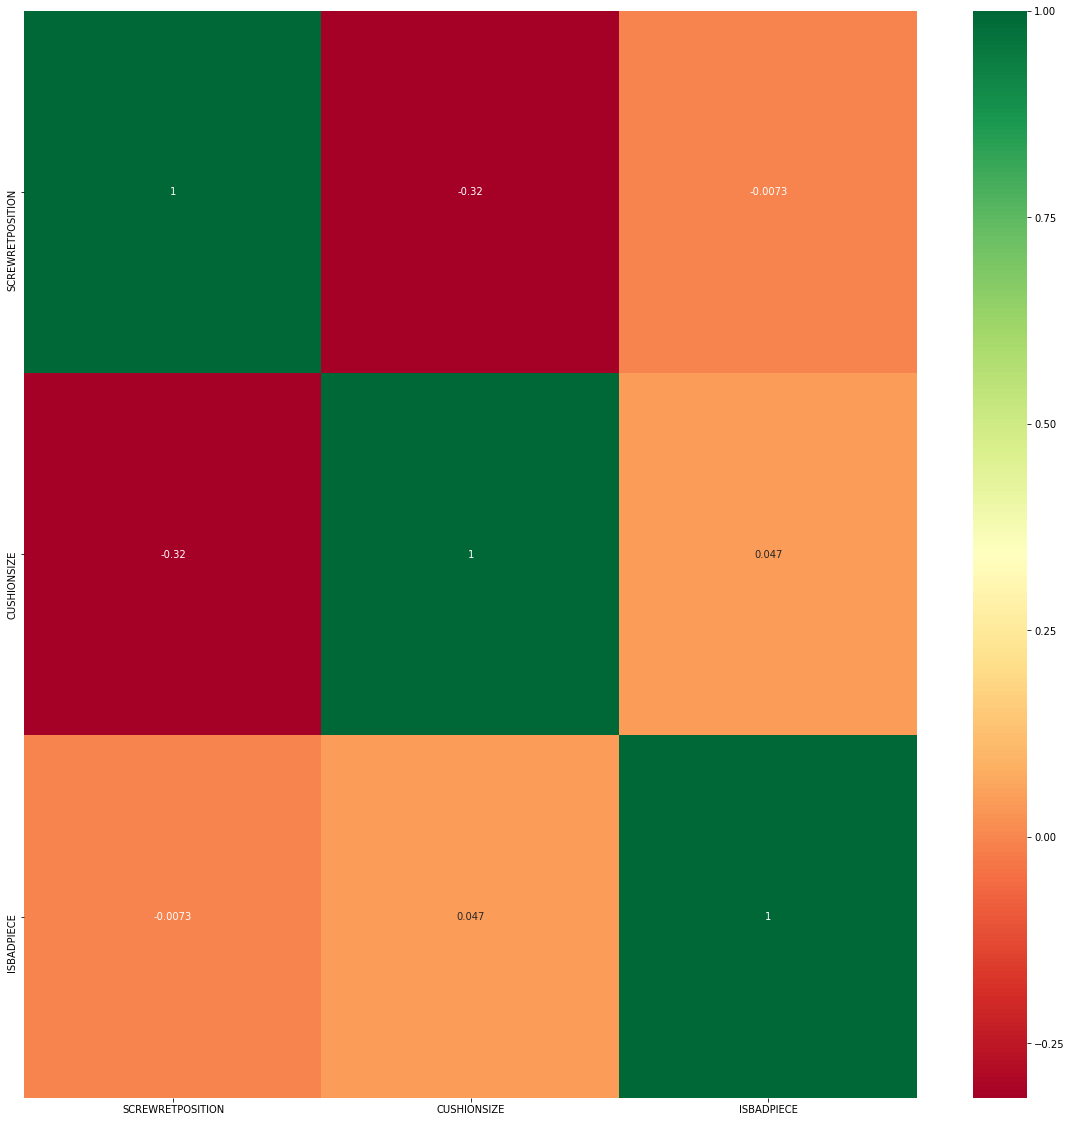

In [79]:
cols=['SCREWRETPOSITION', 'CUSHIONSIZE','ISBADPIECE']
data2=data[cols]
corrmat = data2.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

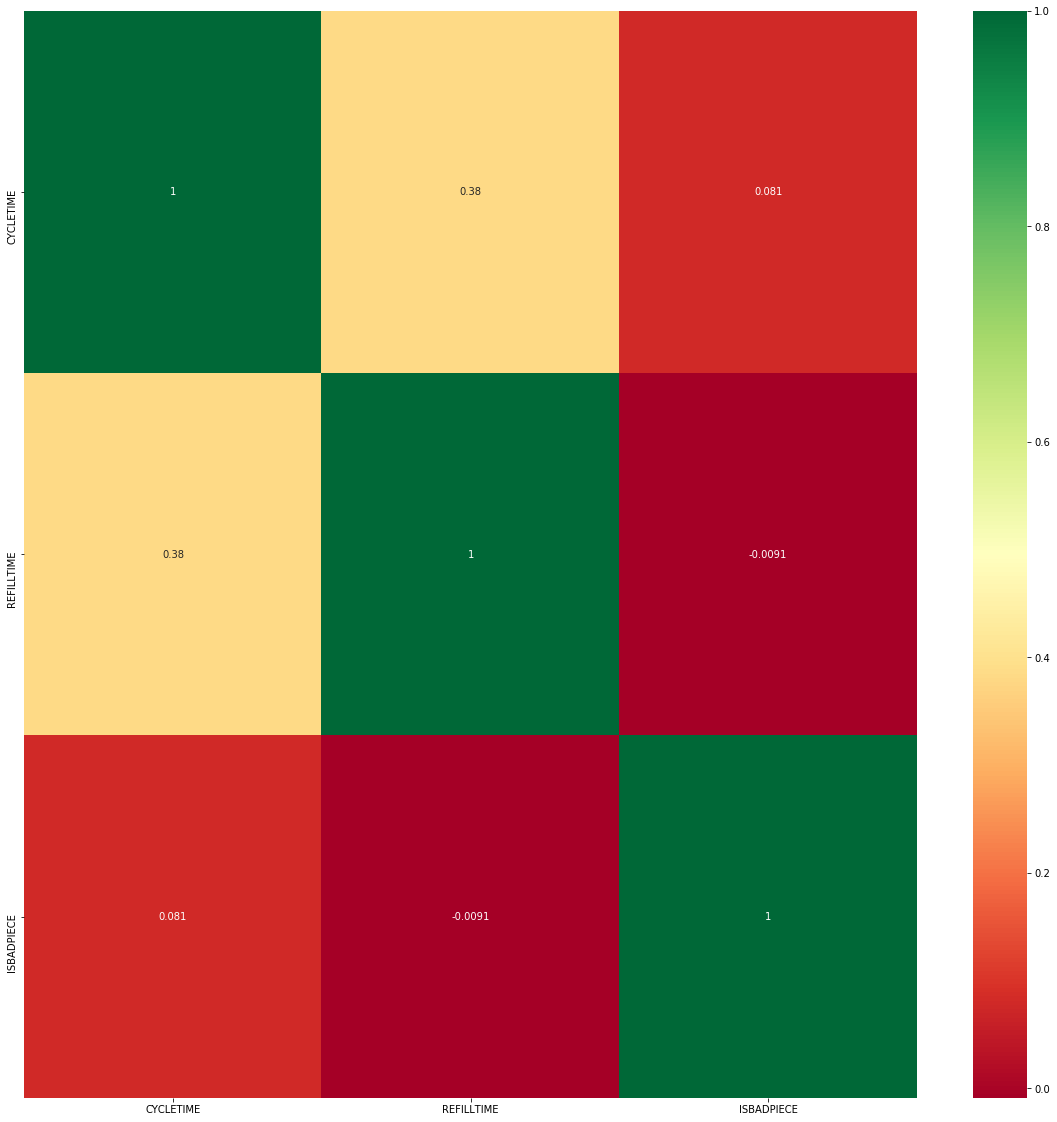

In [80]:
cols=['CYCLETIME','REFILLTIME','ISBADPIECE']
data2=data[cols]
corrmat = data2.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

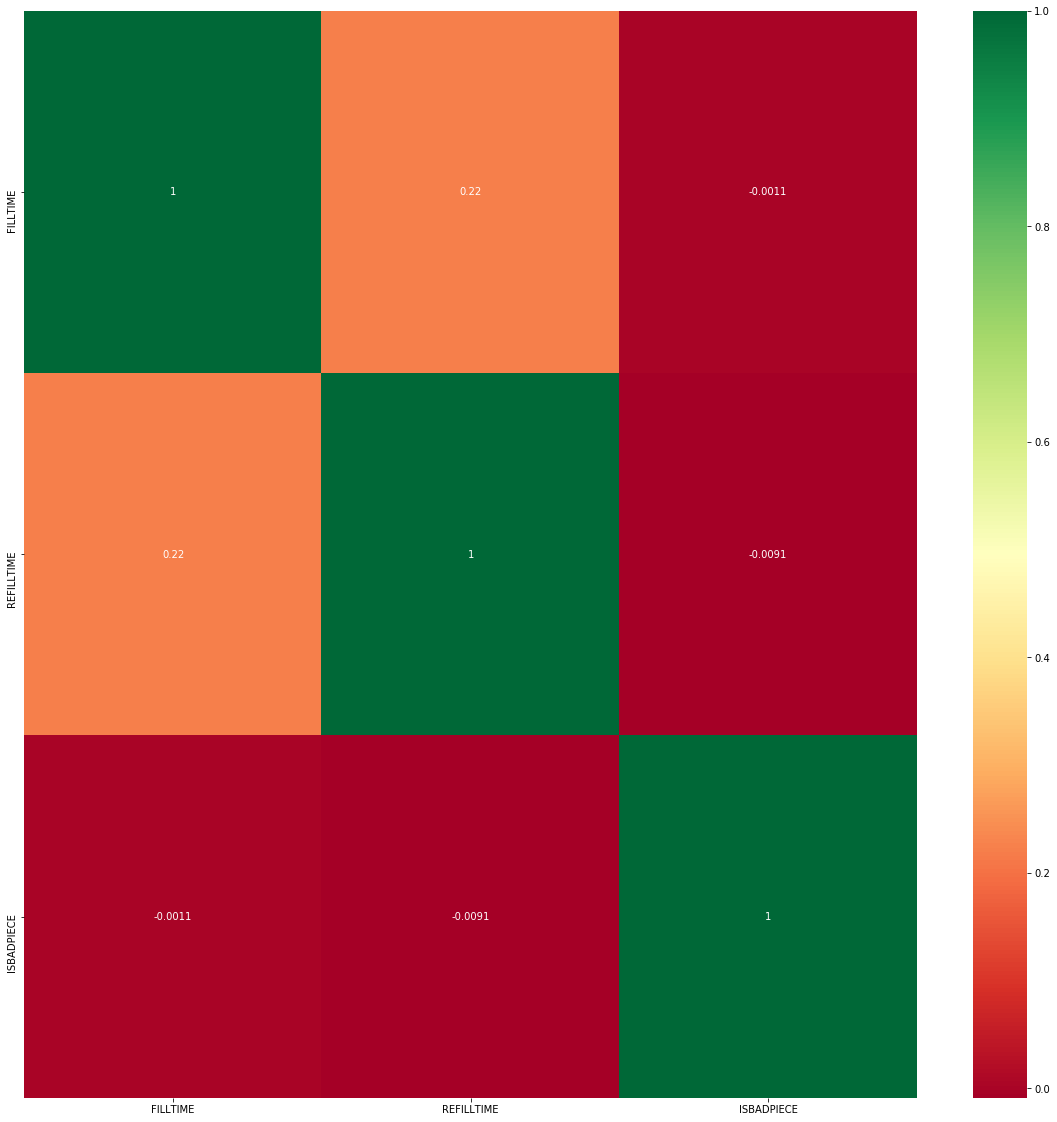

In [81]:
cols=['FILLTIME', 'REFILLTIME','ISBADPIECE']
data2=data[cols]
corrmat = data2.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

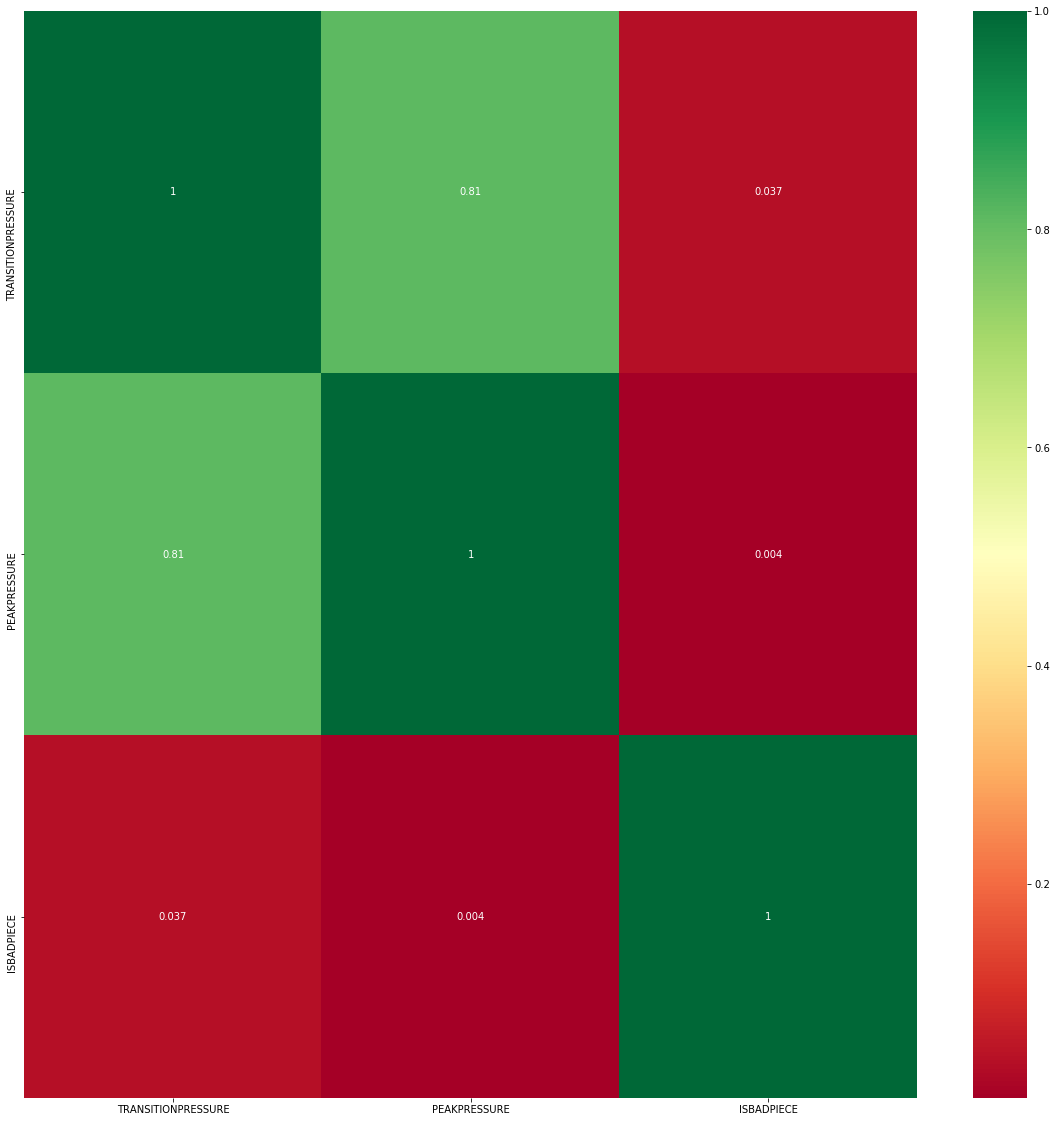

In [82]:
cols=['TRANSITIONPRESSURE','PEAKPRESSURE','ISBADPIECE']
data2=data[cols]
corrmat = data2.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

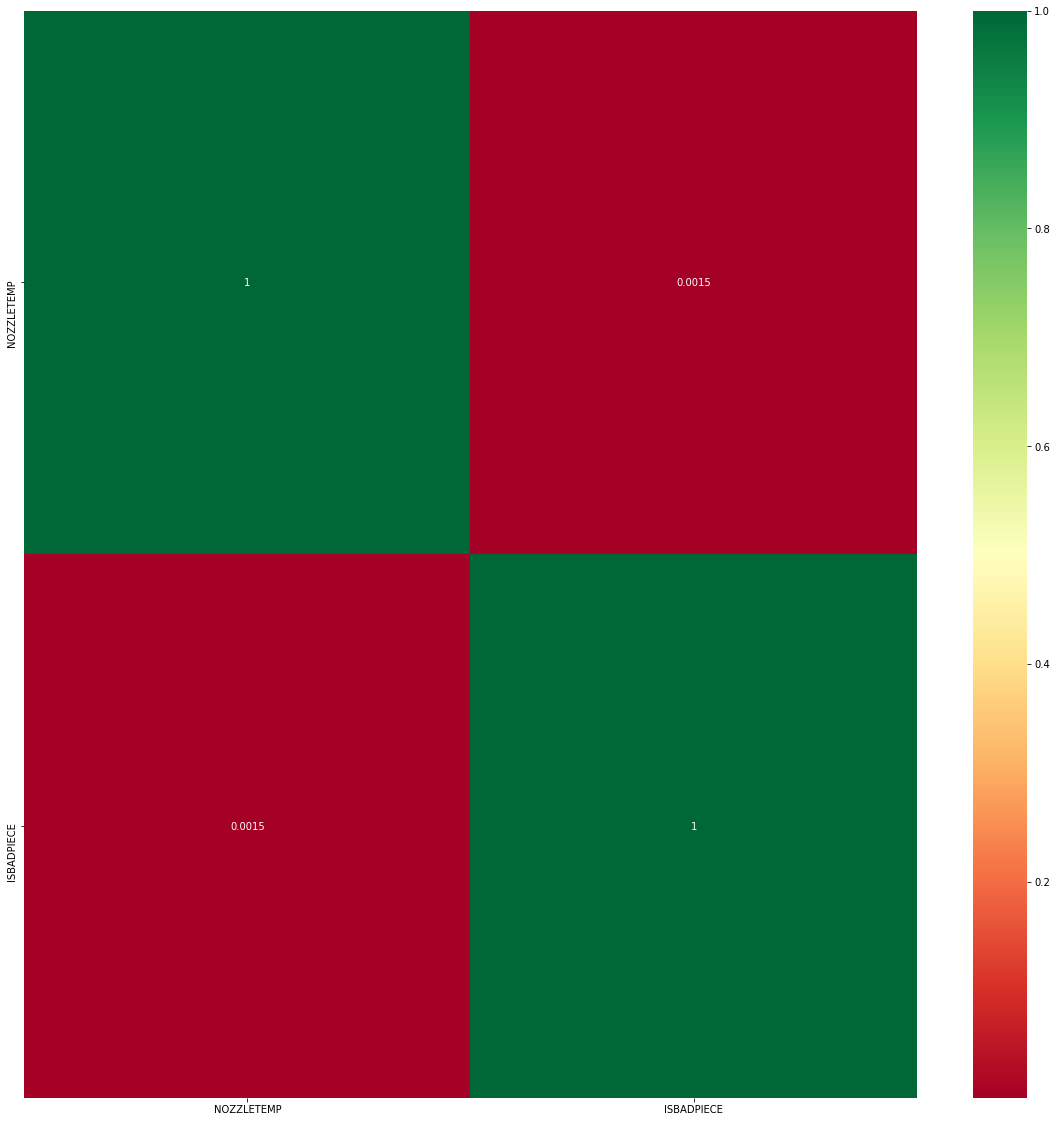

In [83]:
cols=['NOZZLETEMP','ISBADPIECE']
data2=data[cols]
corrmat = data2.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [84]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

C:\Users\Gokhan\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Gokhan\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


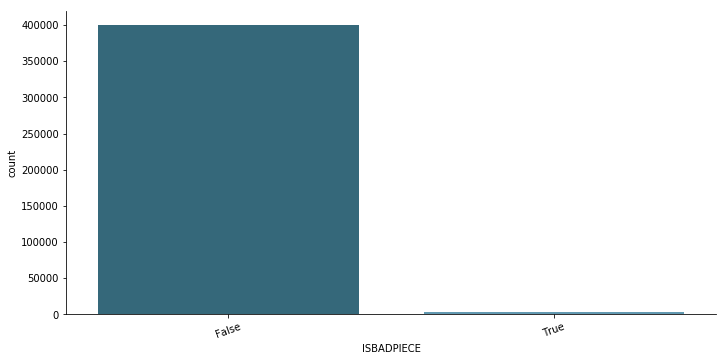

In [85]:
sns.factorplot(x="ISBADPIECE", data=data2, kind="count", size=5, aspect=2, palette="PuBuGn_d")
plt.xticks(rotation=20)
plt.show();

In [86]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

C:\Users\Gokhan\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Gokhan\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


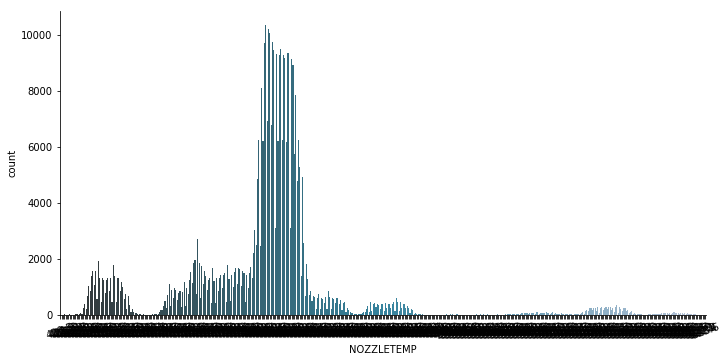

In [87]:
sns.factorplot(x="NOZZLETEMP", data=data2, kind="count", size=5, aspect=2, palette="PuBuGn_d")
plt.xticks(rotation=20)
plt.show();

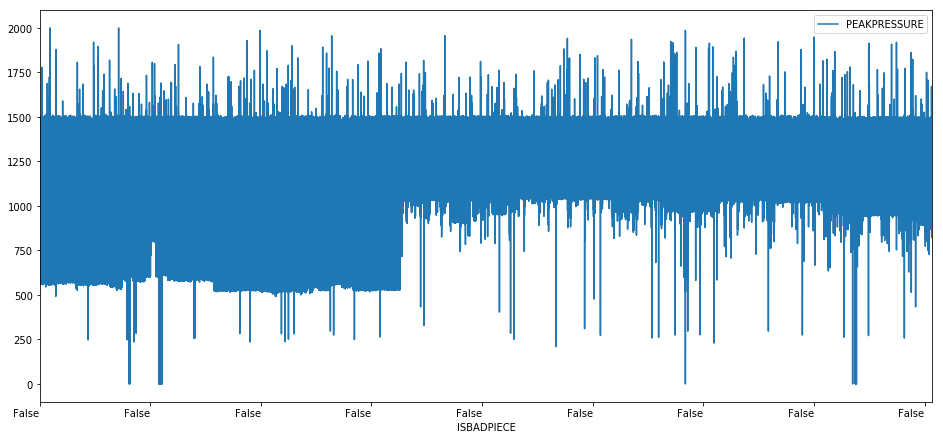

In [94]:
lineplot = data.plot.line(x='ISBADPIECE', y='', subplots=True, rot=0,figsize=(16,8))

C:\Users\Gokhan\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Gokhan\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


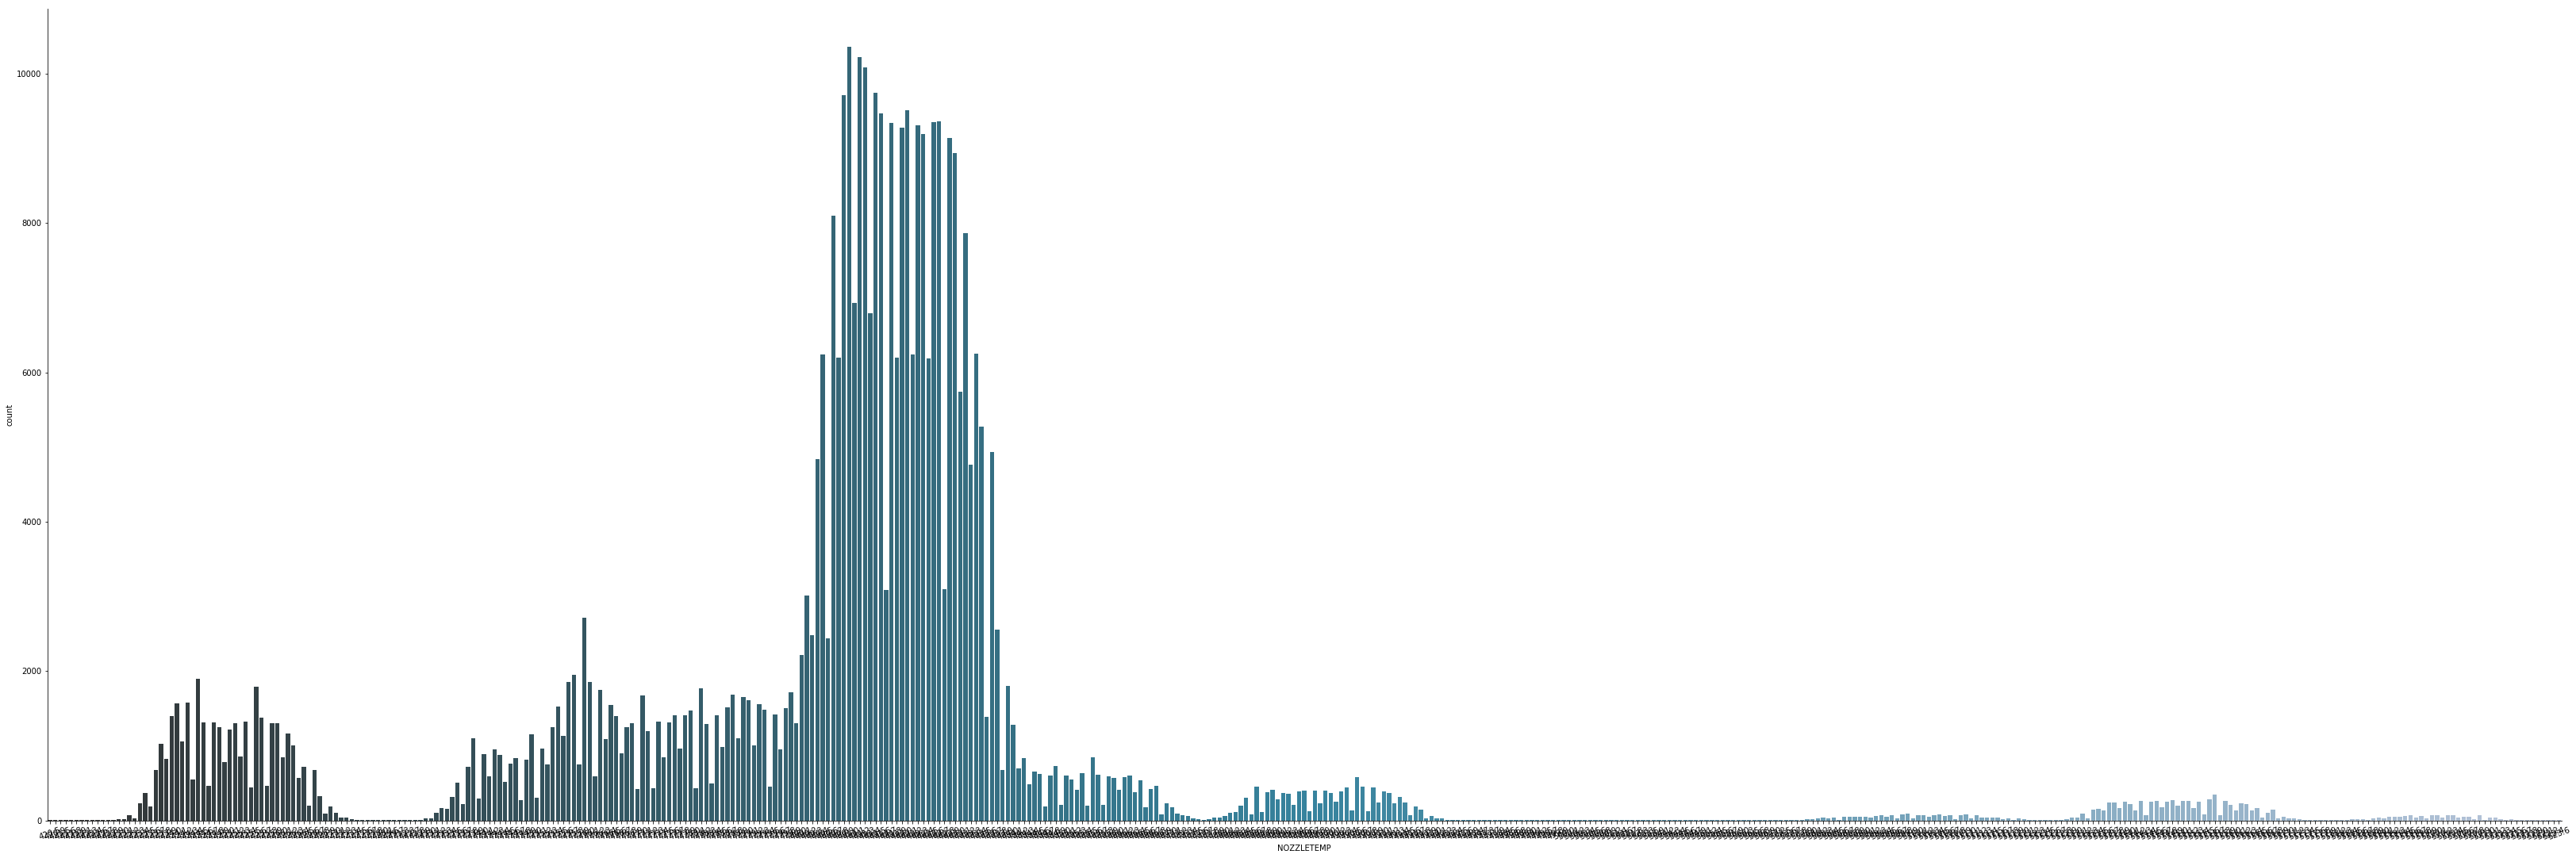

In [91]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())


sns.factorplot(x="NOZZLETEMP", data=data2, kind="count", size=15, aspect=3, palette="PuBuGn_d")
plt.xticks(rotation=20)
plt.show();

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

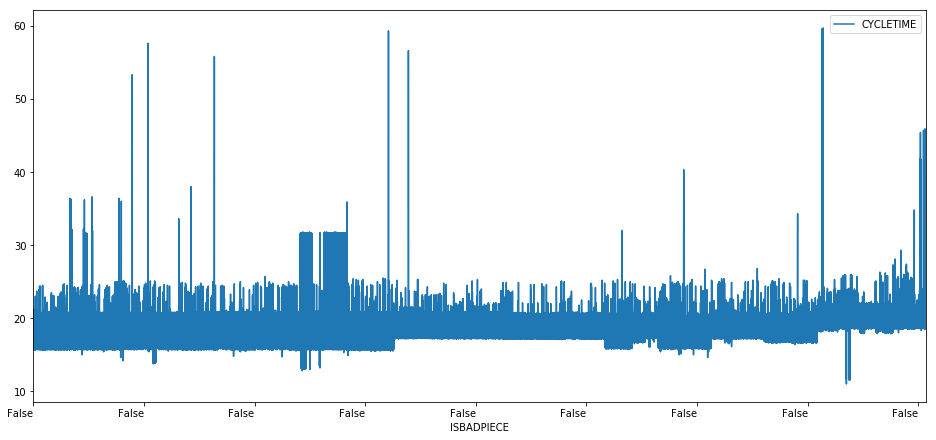

In [95]:
lineplot = data.plot.line(x='ISBADPIECE', y='CYCLETIME', subplots=True, rot=0,figsize=(16,8))


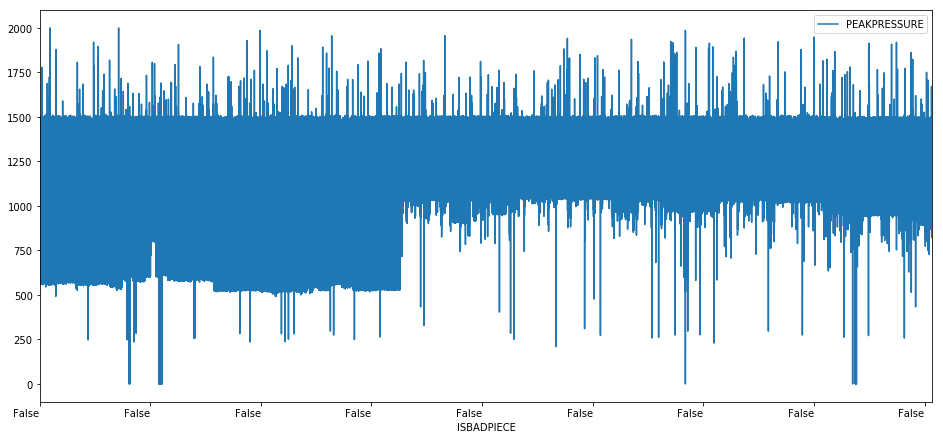

In [31]:
lineplot = data.plot.line(x='ISBADPIECE', y='PEAKPRESSURE', subplots=True, rot=0,figsize=(16,8))

Text(0, 0.5, 'CYCLETIME')

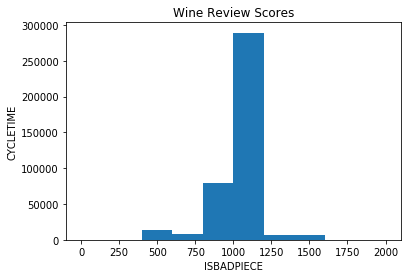

In [39]:
# create figure and axis
fig, ax = plt.subplots()
# plot histogram
ax.hist(data['PEAKPRESSURE'])
# set title and labels
ax.set_title('Wine Review Scores')
ax.set_xlabel('ISBADPIECE')
ax.set_ylabel('CYCLETIME')

In [ ]:
cols=['SCREWRETPOSITION', 'CUSHIONSIZE','ISBADPIECE']

Text(0, 0.5, 'CYCLETIME')

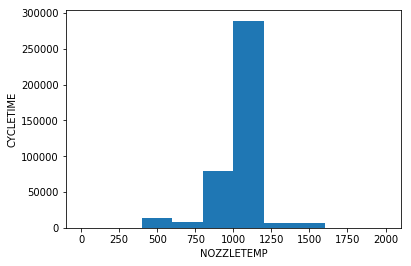

In [96]:
# create figure and axis
fig, ax = plt.subplots()
# plot histogram
ax.hist(data['PEAKPRESSURE'])
# set title and labels
ax.set_title('')
ax.set_xlabel('NOZZLETEMP')
ax.set_ylabel('CYCLETIME')

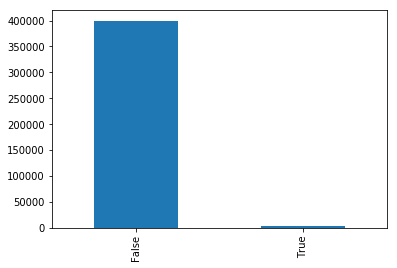

In [45]:
data['ISBADPIECE'].value_counts().sort_index().plot.bar()